In [15]:
import pandas as pd

df = pd.read_csv('C:/Users/bigbo/CodingTemple/Motor_Vehicle_Collisions_-_Crashes_20240412.csv')
print(df.head())
print(df.columns)

C:\Users\bigbo\AppData\Local\Temp\ipykernel_2512\3793216915.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/bigbo/CodingTemple/Motor_Vehicle_Collisions_-_Crashes_20240412.csv')


   CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1             

In [16]:
# Calculate the total number of fatal crashes and their frequency
fatal_crashes = df[df['NUMBER OF PERSONS KILLED'] > 0]
total_fatal_crashes = fatal_crashes.shape[0]

# Calculate the frequency of fatal crashes
frequency = df['CRASH DATE'].nunique()
fatal_crash_frequency = total_fatal_crashes / frequency

print('Total fatal crashes:', total_fatal_crashes)
print('Frequency of fatal crashes:', fatal_crash_frequency)

Total fatal crashes: 2987
Frequency of fatal crashes: 0.6946511627906977


In [17]:
# Convert 'CRASH DATE' to datetime and find the maximum date
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
max_date = df['CRASH DATE'].max()

print('Maximum date in the dataset:', max_date)

Maximum date in the dataset: 2024-04-08 00:00:00


In [18]:
# Define the last 6 months period and the previous 6 months period
last_6_months_start = max_date - pd.DateOffset(months=6)
previous_6_months_start = last_6_months_start - pd.DateOffset(months=6)
previous_6_months_end = last_6_months_start - pd.DateOffset(days=1)

# Calculate the number of crashes in the last 6 months and the previous 6 months
last_6_months_crashes = df[(df['CRASH DATE'] >= last_6_months_start) & (df['CRASH DATE'] <= max_date)].shape[0]
previous_6_months_crashes = df[(df['CRASH DATE'] >= previous_6_months_start) & (df['CRASH DATE'] <= previous_6_months_end)].shape[0]

print('Number of crashes in the last 6 months:', last_6_months_crashes)
print('Number of crashes in the previous 6 months:', previous_6_months_crashes)

Number of crashes in the last 6 months: 46295
Number of crashes in the previous 6 months: 49672


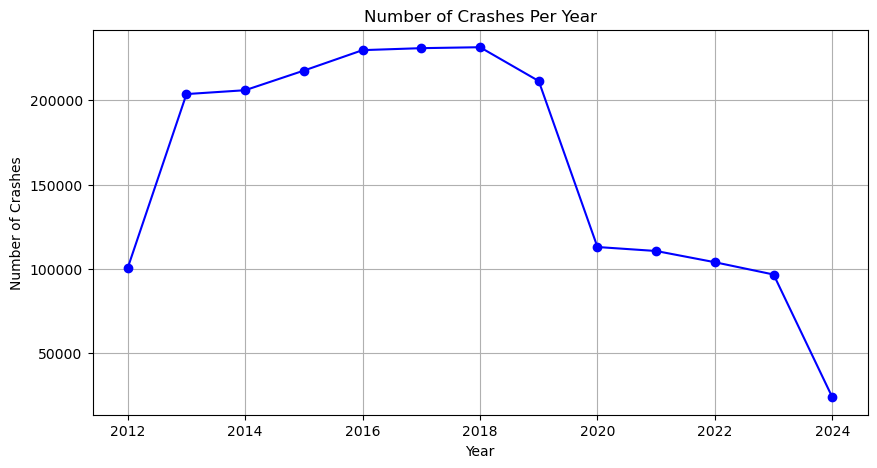

In [28]:
import matplotlib.pyplot as plt


df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Extract year from 'CRASH DATE' and count crashes per year
df['YEAR'] = df['CRASH DATE'].dt.year
crashes_per_year = df.groupby('YEAR').size()

# Plotting the data
crashes_per_year.plot(kind='line', figsize=(10, 5), marker='o', color='b', title='Number of Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

In [21]:
# Calculate the total number of injured cyclists, pedestrians, and motorists
total_injured_cyclists = df['NUMBER OF CYCLIST INJURED'].sum()
total_injured_pedestrians = df['NUMBER OF PEDESTRIANS INJURED'].sum()
total_injured_motorists = df['NUMBER OF MOTORIST INJURED'].sum()

print('Total Injured Cyclists:', total_injured_cyclists)
print('Total Injured Pedestrians:', total_injured_pedestrians)
print('Total Injured Motorists:', total_injured_motorists)


Total Injured Cyclists: 55794
Total Injured Pedestrians: 117754
Total Injured Motorists: 464129


In [22]:
# Calculate the total number of fatalities for cyclists, pedestrians, and motorists
total_dead_cyclists = df['NUMBER OF CYCLIST KILLED'].sum()
total_dead_pedestrians = df['NUMBER OF PEDESTRIANS KILLED'].sum()
total_dead_motorists = df['NUMBER OF MOTORIST KILLED'].sum()

print('Total Dead Cyclists:', total_dead_cyclists)
print('Total Dead Pedestrians:', total_dead_pedestrians)
print('Total Dead Motorists:', total_dead_motorists)

Total Dead Cyclists: 239
Total Dead Pedestrians: 1542
Total Dead Motorists: 1280


In [23]:
# Analyze the street names where collisions most frequently occur
collision_streets = df['ON STREET NAME'].value_counts().head(10)
print(collision_streets)

ON STREET NAME
BROADWAY                            17277
ATLANTIC AVENUE                     15322
BELT PARKWAY                        13543
3 AVENUE                            12476
NORTHERN BOULEVARD                  11965
LONG ISLAND EXPRESSWAY               9928
BROOKLYN QUEENS EXPRESSWAY           9743
FLATBUSH AVENUE                      9741
LINDEN BOULEVARD                     9587
QUEENS BOULEVARD                     9368
Name: count, dtype: int64


In [24]:
# Analyze the common causes of collisions on the top 10 streets with the most incidents
top_streets = ['BROADWAY', 'ATLANTIC AVENUE', 'BELT PARKWAY', '3 AVENUE', 'NORTHERN BOULEVARD', 'LONG ISLAND EXPRESSWAY', 'BROOKLYN QUEENS EXPRESSWAY', 'FLATBUSH AVENUE', 'LINDEN BOULEVARD', 'QUEENS BOULEVARD']
common_causes = df[df['ON STREET NAME'].isin(top_streets)]['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
print(common_causes)

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction    5824
Unspecified                       3801
Following Too Closely             2942
Failure to Yield Right-of-Way     1282
Passing or Lane Usage Improper    1194
Unsafe Lane Changing               967
Unsafe Speed                       950
Other Vehicular                    575
Reaction to Uninvolved Vehicle     497
Traffic Control Disregarded        456
Name: count, dtype: int64


In [25]:
# Analyze the common causes of collisions across all streets
collision_causes = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
print(collision_causes)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       707766
Driver Inattention/Distraction    416266
Failure to Yield Right-of-Way     123586
Following Too Closely             111189
Backing Unsafely                   76834
Other Vehicular                    64531
Passing or Lane Usage Improper     58013
Passing Too Closely                51767
Turning Improperly                 51346
Fatigued/Drowsy                    47406
Name: count, dtype: int64


In [26]:



# Convert the 'CRASH DATE' column to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Calculate the total number of fatalities for the years 2018, 2019, and 2020
total_deaths_2018 = df[df['CRASH DATE'].dt.year == 2018]['NUMBER OF PERSONS KILLED'].sum()
total_deaths_2019 = df[df['CRASH DATE'].dt.year == 2019]['NUMBER OF PERSONS KILLED'].sum()
total_deaths_2020 = df[df['CRASH DATE'].dt.year == 2020]['NUMBER OF PERSONS KILLED'].sum()

print('Total Deaths in 2018:', total_deaths_2018)
print('Total Deaths in 2019:', total_deaths_2019)
print('Total Deaths in 2020:', total_deaths_2020)

Total Deaths in 2018: 231.0
Total Deaths in 2019: 244.0
Total Deaths in 2020: 269.0


In [27]:
total_injuries_2018 = df[df['CRASH DATE'].dt.year == 2018]['NUMBER OF PERSONS INJURED'].sum()
total_injuries_2019 = df[df['CRASH DATE'].dt.year == 2019]['NUMBER OF PERSONS INJURED'].sum()
total_injuries_2020 = df[df['CRASH DATE'].dt.year == 2020]['NUMBER OF PERSONS INJURED'].sum()

print(total_injuries_2018)
print(total_injuries_2019)
print(total_injuries_2020)

61941.0
61389.0
44614.0
